# Linear Regression Assignment

## Sections of assignment
[Problem Statement](#problem_statment)<BR>
[Business Goal](#business_goal)<BR>
[EDA](#eda)<BR>
[Preparing the model](#model_prep)<BR>
- [Model without car company](#model_without_car_company)<BR>
- [Create a model with car companies grouped into categories based on price](#model_with_company_groups)<BR>
- [Model with car companies as it is](#model_with_companys)<BR>
[Conclusions](#conclusions)<BR>

<a id='problem_statment'/>

## Problem Statement

A **Chinese** automobile company **Geely Auto** aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

The company wants to know:
- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

<a id='business_goal'/>

## Business Goal 
- Price of cars with the available independent variables
- Model will be used by the management to understand how exactly the prices vary with the independent variables. 
- Will help to manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
- Model will be a good way for management to understand the pricing dynamics of a new market.

<a id='eda'/>

[EDA](#eda)<BR>
[Preparing the model](#model_prep)<BR>
- [Model without car company](#model_without_car_company)<BR>
- [Create a model with car companies grouped into categories based on price](#model_with_company_groups)<BR>
- [Model with car companies as it is](#model_with_companys)<BR>
[Conclusions](#conclusions)<BR>

## Exploratory Data Analysis

### Import the data

Import data and understand the size, type of data, statistics of the numerical columns

In [1585]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

%matplotlib inline

In [1586]:
#Import the data

car_pricing_ds = pd.read_csv("CarPrice_Assignment.csv", encoding = "ISO-8859-1")
car_pricing_ds.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [1587]:
car_pricing_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [1588]:
car_pricing_ds.shape

(205, 26)

In [1589]:
car_pricing_ds.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleanup

Initial cleanups
- car_ID is just an identifier, so it should be removed
- Make all string columns to lower case
- CarName 
    - To be split to consider only company name in the data
    - Correct the wrong spelling entries for car company names
- Number of cylinders and number of doors changed to numerical values

In [1590]:
# Remove car_ID column
car_pricing_ds.drop(labels=['car_ID'], inplace=True, axis=1)

#Noticed some values having caps. Changing all string columns to lower
car_pricing_ds_string_columns = car_pricing_ds.select_dtypes(['object'])
car_pricing_ds[car_pricing_ds_string_columns.columns] = car_pricing_ds[car_pricing_ds_string_columns.columns].apply(lambda x: x.str.lower())
car_pricing_ds.head()

#Consider only companyname out of the CarName. 
car_pricing_ds['carcompany'], car_pricing_ds['carmodel'] = car_pricing_ds['CarName'].str.split(' ', 1).str
#Drop CarName, carmodel
#Correct the spellings
car_pricing_ds.drop(labels=['CarName', 'carmodel'], inplace=True, axis=1)
car_pricing_ds['carcompany'] = car_pricing_ds['carcompany'].apply(lambda x: x.replace("vw", "volkswagen"))
car_pricing_ds['carcompany'] = car_pricing_ds['carcompany'].apply(lambda x: x.replace("maxda", "mazda"))
car_pricing_ds['carcompany'] = car_pricing_ds['carcompany'].apply(lambda x: x.replace("porcshce", "porsche"))
car_pricing_ds['carcompany'] = car_pricing_ds['carcompany'].apply(lambda x: x.replace("toyouta", "toyota"))
car_pricing_ds['carcompany'] = car_pricing_ds['carcompany'].apply(lambda x: x.replace("vokswagen", "volkswagen"))

#Correct spellings of engine types
car_pricing_ds['enginetype'] = car_pricing_ds['enginetype'].apply(lambda x: x.replace("dohcv", "dohc"))
car_pricing_ds.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [1591]:
map_of_words_to_numbers = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}

In [1592]:
#Map the cylinder and door number names to actual number
car_pricing_ds['cylindernumber'] = car_pricing_ds[['cylindernumber']].apply(lambda x: x.map(map_of_words_to_numbers))
car_pricing_ds['doornumber'] = car_pricing_ds[['doornumber']].apply(lambda x: x.map(map_of_words_to_numbers))
car_pricing_ds


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000,alfa-romero
1,3,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000,alfa-romero
2,1,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000,alfa-romero
3,2,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000,audi
4,2,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000,audi
5,2,gas,std,2,sedan,fwd,front,99.8,177.3,66.3,...,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000,audi
6,1,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000,audi
7,1,gas,std,4,wagon,fwd,front,105.8,192.7,71.4,...,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000,audi
8,1,gas,turbo,4,sedan,fwd,front,105.8,192.7,71.4,...,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000,audi
9,0,gas,turbo,2,hatchback,4wd,front,99.5,178.2,67.9,...,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167,audi


#### Correlation among numerical variables

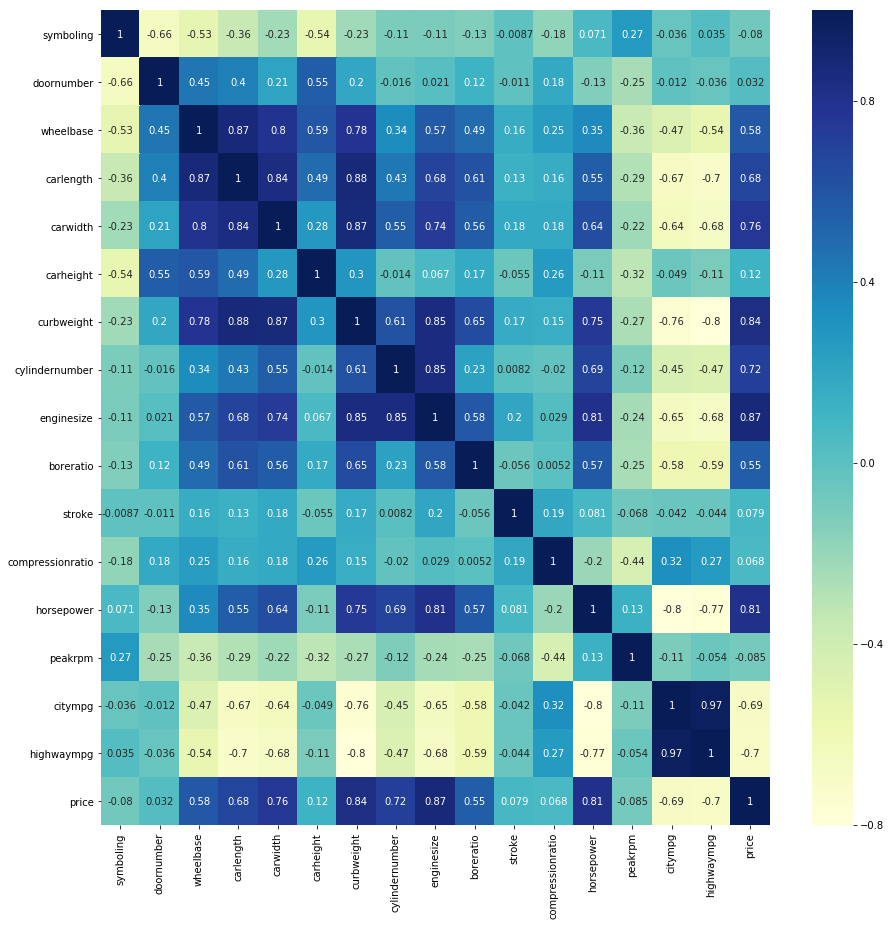

In [1593]:
plt.figure(figsize=(15,15))
sns.heatmap(car_pricing_ds.corr(), cmap="YlGnBu", annot = True)
plt.show()

**Some observations from the heatmap for the numerical variables are:**
- 'enginesize' has the highest correlation with price
- Next strongly correlated variables with price in that order are 'curbweight' and 'horsepower'
- 'enginesize' is highly correlated with 'cylindernumber' and 'horsepower'
- 'highwaympg' and 'citympg' are very highly correlated
- 'wheelbase' is higly correlated with 'carlength' and 'carwidth'
- 'curbweight' is higly correlated with 'carlength' and 'carwidth'
- 'carlength' is higly correlated with 'carwidth'

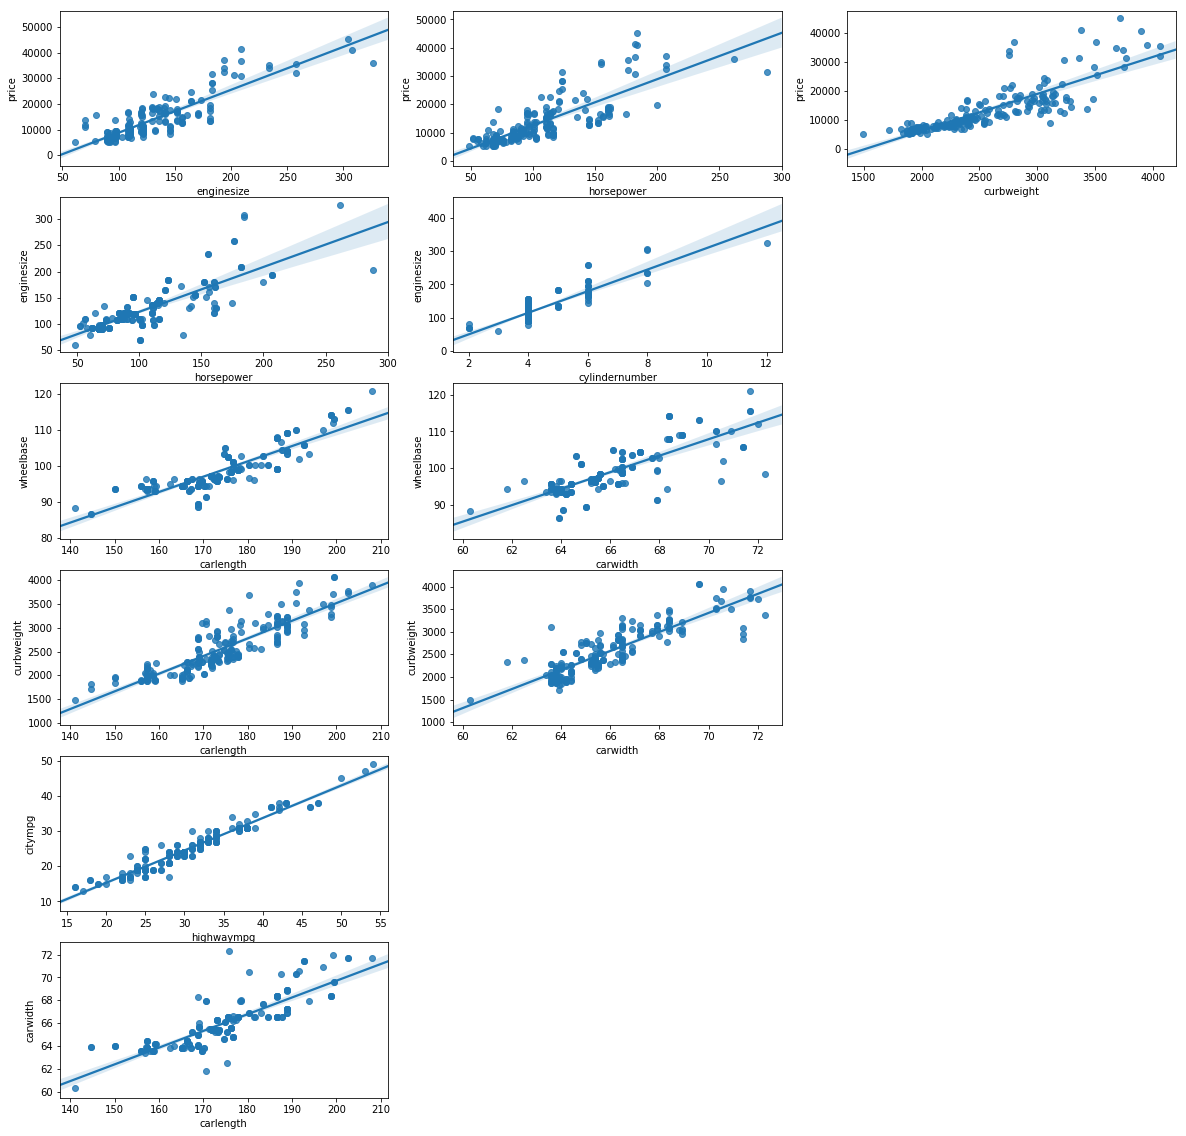

In [1594]:
# Summarize it visually 
plt.figure(figsize=(20, 20))
plt.subplot(6,3,1)
sns.regplot(x='enginesize', y='price', data=car_pricing_ds)
plt.subplot(6,3,2)
sns.regplot(x='horsepower', y='price', data=car_pricing_ds)
plt.subplot(6,3,3)
sns.regplot(x='curbweight', y='price', data=car_pricing_ds)
plt.subplot(6,3,4)
sns.regplot(x='horsepower', y='enginesize', data=car_pricing_ds)
plt.subplot(6,3,5)
sns.regplot(x='cylindernumber', y='enginesize', data=car_pricing_ds)
plt.subplot(6,3,7)
sns.regplot(x='carlength', y='wheelbase', data=car_pricing_ds)
plt.subplot(6,3,8)
sns.regplot(x='carwidth', y='wheelbase', data=car_pricing_ds)
plt.subplot(6,3,10)
sns.regplot(x='carlength', y='curbweight', data=car_pricing_ds)
plt.subplot(6,3,11)
sns.regplot(x='carwidth', y='curbweight', data=car_pricing_ds)
plt.subplot(6,3,13)
sns.regplot(x='highwaympg', y='citympg', data=car_pricing_ds)
plt.subplot(6,3,16)
sns.regplot(x='carlength', y='carwidth', data=car_pricing_ds)
plt.show()

#### Correlations for categorical variables

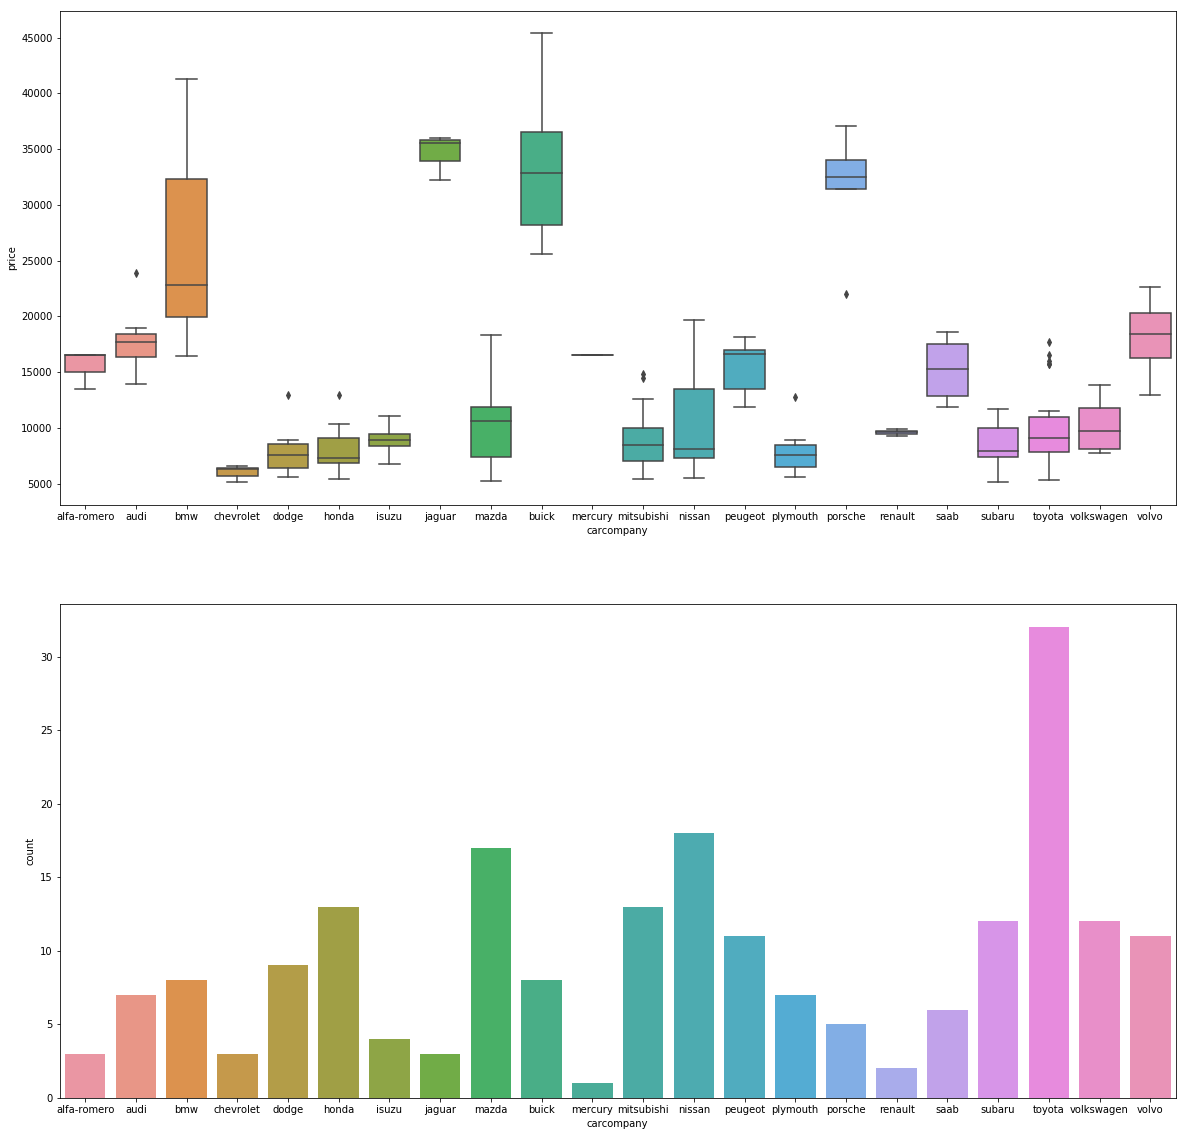

In [1595]:
plt.figure(figsize=(20, 20))
plt.subplot(2,1,1)
sns.boxplot(x = 'carcompany', y = 'price', data = car_pricing_ds)
plt.subplot(2,1,2)
sns.countplot(x = 'carcompany', data = car_pricing_ds)
plt.show()

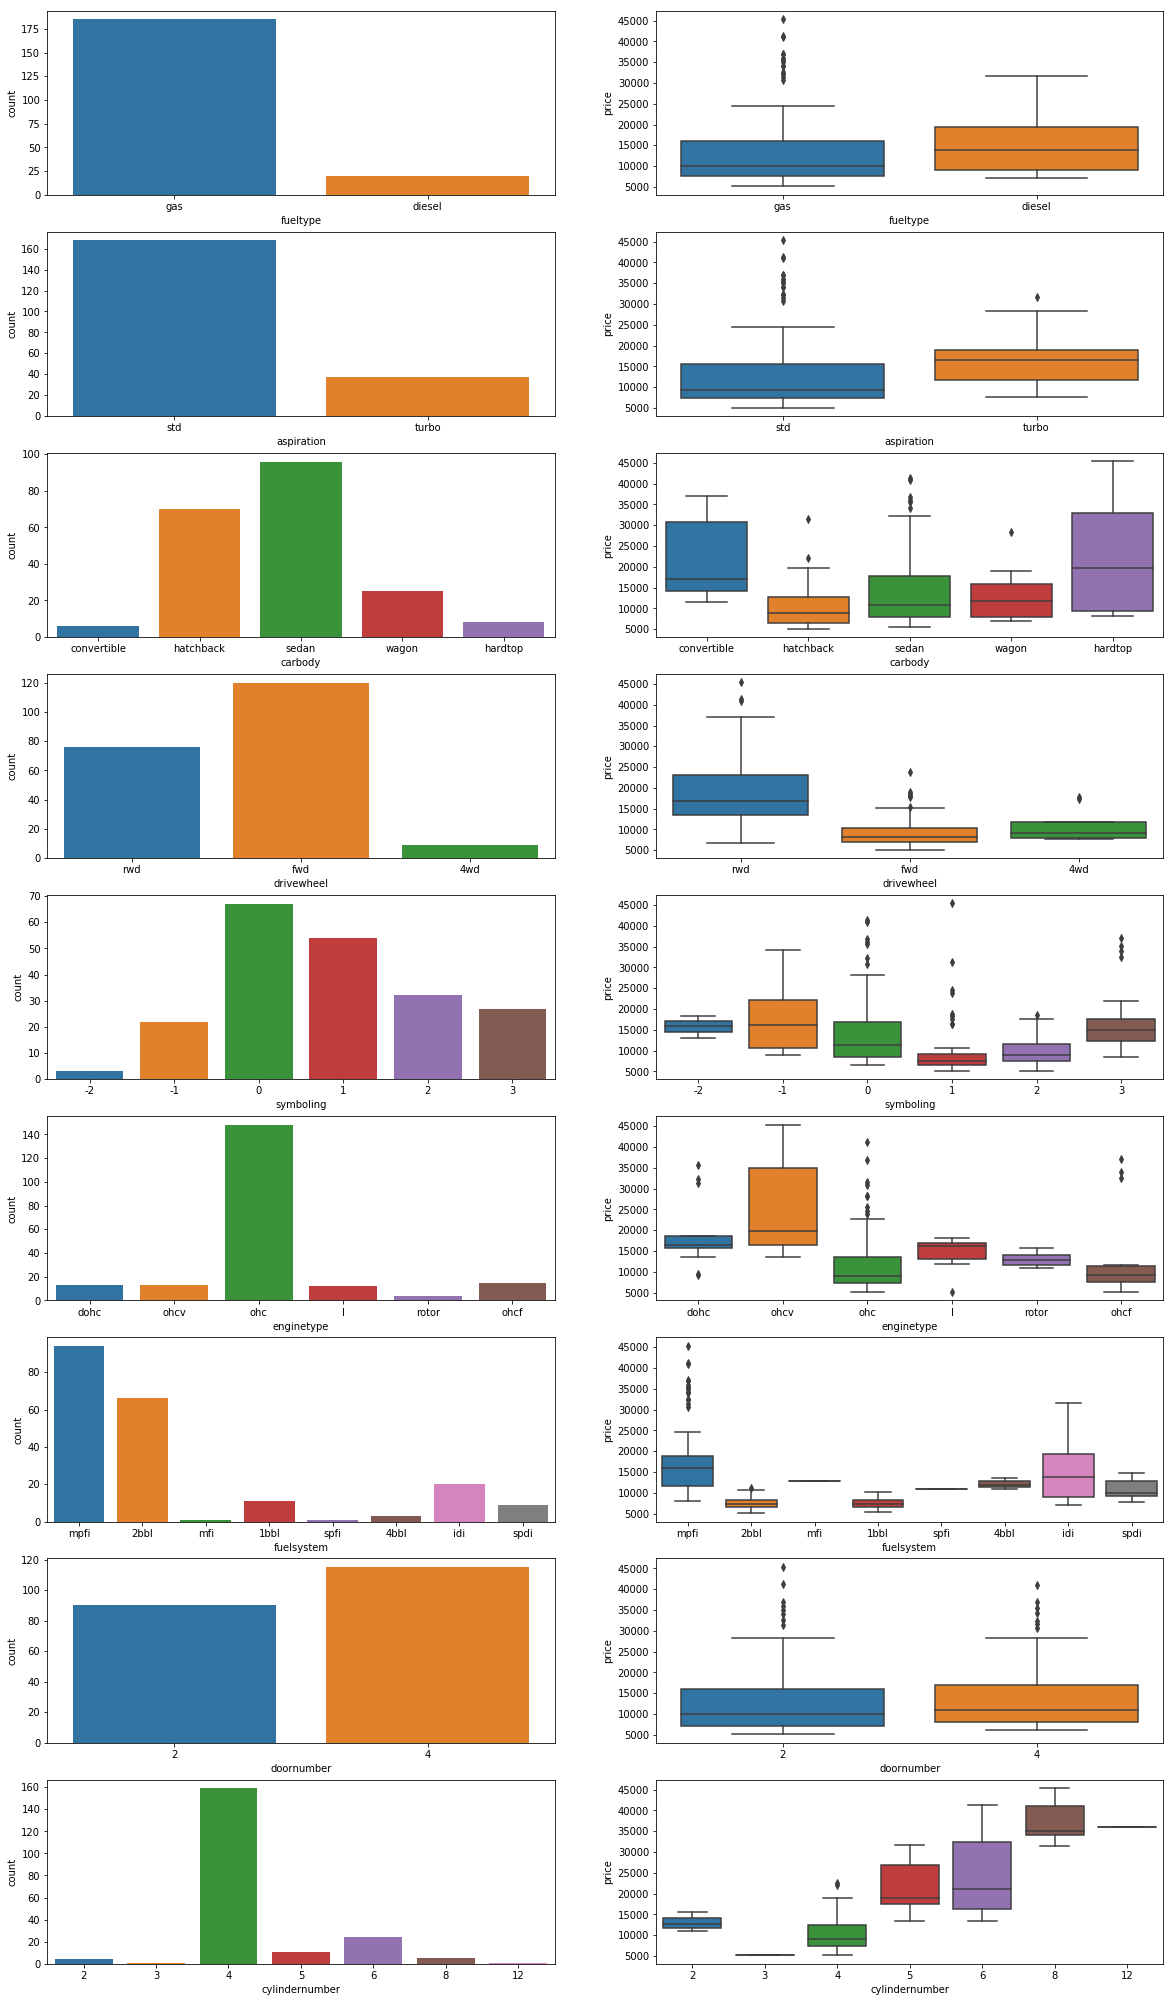

In [1596]:
plt.figure(figsize=(20, 40))
plt.subplot(10,2,1)
sns.countplot(x = 'fueltype', data = car_pricing_ds)
plt.subplot(10,2,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,3)
sns.countplot(x = 'aspiration', data = car_pricing_ds)
plt.subplot(10,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,5)
sns.countplot(x = 'carbody', data = car_pricing_ds)
plt.subplot(10,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,7)
sns.countplot(x = 'drivewheel', data = car_pricing_ds)
plt.subplot(10,2,8)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,9)
sns.countplot(x = 'symboling', data = car_pricing_ds)
plt.subplot(10,2,10)
sns.boxplot(x = 'symboling', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,11)
sns.countplot(x = 'enginetype', data = car_pricing_ds)
plt.subplot(10,2,12)
sns.boxplot(x = 'enginetype', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,13)
sns.countplot(x = 'fuelsystem', data = car_pricing_ds)
plt.subplot(10,2,14)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,15)
sns.countplot(x = 'doornumber', data = car_pricing_ds)
plt.subplot(10,2,16)
sns.boxplot(x = 'doornumber', y = 'price', data = car_pricing_ds)
plt.subplot(10,2,17)
sns.countplot(x = 'cylindernumber', data = car_pricing_ds)
plt.subplot(10,2,18)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_pricing_ds)

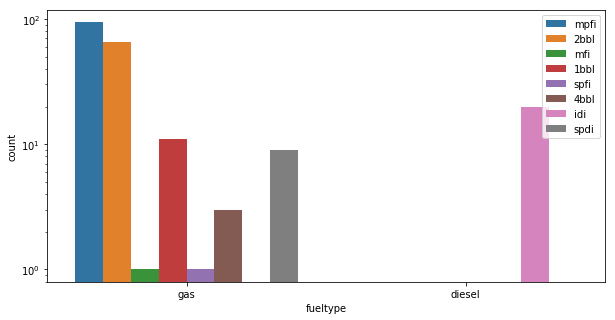

In [1597]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x = 'fueltype', hue='fuelsystem', data = car_pricing_ds)
g.set_yscale('log')
plt.legend(loc='upper right')
plt.show()

In [1598]:
print(car_pricing_ds['fueltype'].value_counts())
print(car_pricing_ds['aspiration'].value_counts())
print(car_pricing_ds['carbody'].value_counts())
print(car_pricing_ds['drivewheel'].value_counts())
print(car_pricing_ds['enginelocation'].value_counts())
print(car_pricing_ds['enginetype'].value_counts())
print(car_pricing_ds['fuelsystem'].value_counts())
print(car_pricing_ds['carcompany'].value_counts())
print(car_pricing_ds['symboling'].value_counts())
print(car_pricing_ds['cylindernumber'].value_counts())
print(car_pricing_ds['doornumber'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
std      168
turbo     37
Name: aspiration, dtype: int64
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64
fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64
front    202
rear       3
Name: enginelocation, dtype: int64
ohc      148
ohcf      15
dohc      13
ohcv      13
l         12
rotor      4
Name: enginetype, dtype: int64
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64
toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
mercury         1
Name: carcompany, d

**Some observations from the heatmap for the categorical variables are:**
- fuelsystem and fueltype are highly correlated. The diesel type of cars only have the idi fuelsystem.
- There are categories which have very less number of records, but filtering out these records cumulatively(say records in each category which are <=3) is removing about 12% of the rows which is high in a ~200 row dataset and is affecting the r2_score. Hence not filtering out the data. 
- Moreover, based on certain features, car companies do have have models which are way higher in cost than the other companies. Eg.Porsche Cayenne is the most expensive hatchback in the dataset and may seem as an outlier w.r.t price, but the fact that it has a different engine and cylinder number needs to be noted and taken into account.

### Column filtering based on correlations

Drop columns based on the heatmap, so that multi-collinearity does not affect the model. Doing this as part of the EDA conclusions. If not done at this stage, the VIF values are very huge, sometimes infinite. Keeping these variables in the dataset  when the high correlation is known upfront is, unecessary. It also affects the R-2 score.

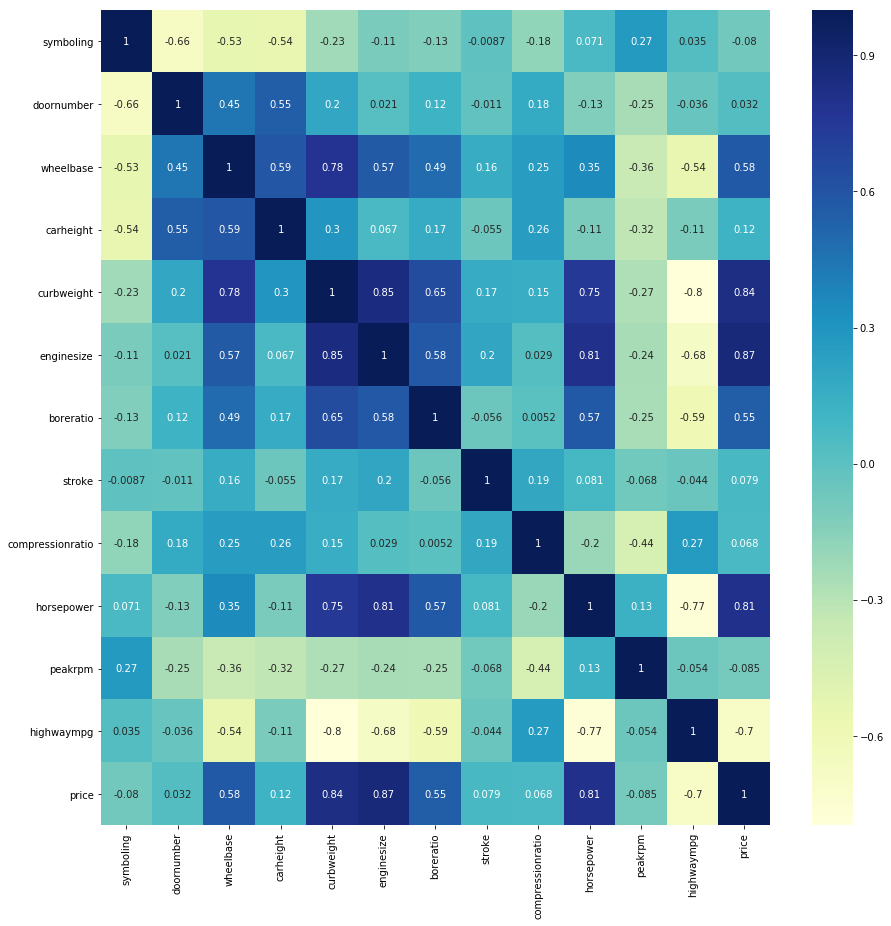

In [1599]:
car_pricing_ds.drop(labels=['citympg', 'cylindernumber', 'carlength', 'carwidth', 'fueltype'], inplace=True, axis=1)
plt.figure(figsize=(15,15))
sns.heatmap(car_pricing_ds.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Make some numerical variables as categorical, so that it is not considered as continuous while builing the model

In [1600]:
car_pricing_ds['symboling'] = car_pricing_ds['symboling'].astype('category')
car_pricing_ds['doornumber'] = car_pricing_ds['doornumber'].astype('category')

<a id='model_prep'/>

[EDA](#eda)<BR>
[Preparing the model](#model_prep)<BR>
- [Model without car company](#model_without_car_company)<BR>
- [Create a model with car companies grouped into categories based on price](#model_with_company_groups)<BR>
- [Model with car companies as it is](#model_with_companys)<BR>
[Conclusions](#conclusions)<BR>

## Preparing the Model

### Data Preparation

In [1601]:
#Create dummy variables and remove ones which have less span of the prices between the 25th and 75th percentile
def create_dummies_for_cat_columns(col_name, pref, car_pricing_ds):    
    dummy_df = pd.get_dummies(car_pricing_ds[col_name],  prefix=pref, drop_first = False)
    car_pricing_ds = pd.concat([car_pricing_ds, dummy_df], axis = 1)
    car_pricing_ds.drop(labels=[col_name], inplace=True, axis=1)
    return car_pricing_ds
    
car_pricing_ds = create_dummies_for_cat_columns('carbody', None, car_pricing_ds) 
car_pricing_ds.drop(labels=['hatchback'], inplace=True, axis=1)

car_pricing_ds = create_dummies_for_cat_columns('drivewheel', 'drivewheel', car_pricing_ds) 
car_pricing_ds.drop(labels=['drivewheel_4wd'], inplace=True, axis=1)

car_pricing_ds = create_dummies_for_cat_columns('enginetype', 'enginetype', car_pricing_ds) 
car_pricing_ds.drop(labels=['enginetype_dohc'], inplace=True, axis=1)

car_pricing_ds = create_dummies_for_cat_columns('fuelsystem', 'fuelsystem', car_pricing_ds) 
car_pricing_ds.drop(labels=['fuelsystem_1bbl'], inplace=True, axis=1)

car_pricing_ds = create_dummies_for_cat_columns('symboling', 'symboling', car_pricing_ds) 
car_pricing_ds.drop(labels=['symboling_-2'], inplace=True, axis=1)

car_pricing_ds.head()

,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,std,2,front,88.6,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,1
1,std,2,front,88.6,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,1
2,std,2,front,94.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,0,1,0,0
3,std,4,front,99.8,54.3,2337,109,3.19,3.40,10.0,...,0,0,1,0,0,0,0,0,1,0
4,std,4,front,99.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,1,0,0,0,0,0,1,0


In [1602]:
#Map 0,1 for columns having 2 unique values
car_pricing_ds_category_columns_2_values = ['aspiration', 'enginelocation', 'doornumber']
for col in car_pricing_ds_category_columns_2_values:
    unique_values_for_col = car_pricing_ds[col].unique()
    dict_of_mapping = dict(zip(unique_values_for_col, list(range(len(unique_values_for_col)))))
    car_pricing_ds[[col]] = car_pricing_ds[[col]].apply(lambda x: x.map(dict_of_mapping))
car_pricing_ds.head()

,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,0,0,0,88.6,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,88.6,48.8,2548,130,3.47,2.68,9.0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,94.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,1,0,0,0,0,1,0,0
3,0,1,0,99.8,54.3,2337,109,3.19,3.40,10.0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,99.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,1,0,0,0,0,0,1,0


In [1603]:
car_pricing_ds.columns

Index(['aspiration', 'doornumber', 'enginelocation', 'wheelbase', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'highwaympg', 'price', 'carcompany',
       'convertible', 'hardtop', 'sedan', 'wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'symboling_-1',
       'symboling_0', 'symboling_1', 'symboling_2', 'symboling_3'],
      dtype='object')

## Define the steps as re-usable functions

In [1604]:
def split_and_scale_data(car_pricing_ds):
    # We specify this so that the train and test data set always have the same rows, respectively
    df_train, df_test = train_test_split(car_pricing_ds, train_size = 0.7, test_size = 0.3, random_state = 100)

    scaler = MinMaxScaler()
    df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
    return df_train, df_test, scaler

In [1605]:
def get_Xtrain_ytrain(df_train):
    y_train = df_train.pop('price')
    X_train = df_train
    return X_train, y_train

def perform_rfe(num_of_desired_features, X_train, y_train):
    # Running RFE with the output number of the variable equal to 10
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    rfe = RFE(lm, num_of_desired_features)             # running RFE
    rfe = rfe.fit(X_train, y_train)
    return rfe

In [1606]:
def get_RFE_dataset(rfe, X_train):
    rferanking = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
    rferanking.rename(columns={0:'predictor', 1:'rfesupport',2:'rferanking'}, inplace=True)
    rferanking.sort_values(by='rferanking', ascending=True, inplace=True)
    X_train_rfe = X_train[X_train.columns[rfe.support_]]
    return rferanking, X_train_rfe

In [1607]:
def train_initial_model(X_train_rfe, y_train):
    X_train_lm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model    
    return X_train_lm, lm

In [1608]:
def train_model(X_train_rfe, y_train):
    X_train_lm = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
    pvals= lm.pvalues.round(decimals=3)
    while (all(i < 0.05 for i in pvals) == False):
        pvals.drop(labels=['const'], inplace=True)
        pvals = pvals.sort_values(ascending=False)        
        X_train_rfe.drop(labels=[pvals.idxmax()], inplace=True, axis=1)
        X_train_lm = sm.add_constant(X_train_rfe)
        lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
        pvals= lm.pvalues.round(decimals=3)   
    return X_train_lm, lm

In [1609]:
def calc_vif(X_train_lm):
    X_train_new = X_train_lm.drop(['const'], axis=1)
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [1610]:
def iterate_to_get_best_model(X_train_rfe, y_train):
    X_train_lm, lm = train_model(X_train_rfe, y_train)
    vif = calc_vif(X_train_lm)
    while (all(i < 10 for i in vif['VIF']) == False):        
        X_train_rfe.drop(labels=[vif.iloc[0][0]], inplace=True, axis=1)
        X_train_lm, lm = train_model(X_train_rfe, y_train)
        vif = calc_vif(X_train_lm)
    return X_train_lm, lm, vif    

In [1611]:
def plot_error_terms(X_train_lm, y_train, lm):
    y_train_price = lm.predict(X_train_lm)
    fig = plt.figure()
    sns.distplot((y_train - y_train_price), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18) 

In [1612]:
def predict_on_test_set(X_train_lm, df_test, scaler, lm):
    X_train_new = X_train_lm.drop(['const'], axis=1)
    df_test[df_test.columns] = scaler.transform(df_test[df_test.columns])

    y_test = df_test.pop('price')
    X_test = df_test

    # Now let's use our model to make predictions.

    # Creating X_test_new dataframe by dropping variables from X_test
    X_test_new = X_test[X_train_new.columns]

    # Adding a constant variable 
    X_test_new = sm.add_constant(X_test_new)

    # Making predictions
    y_pred = lm.predict(X_test_new)
    return y_test, y_pred

def plot_ytest_ypred(y_test, y_pred, title):
    # Plotting y_test and y_pred to understand the spread.
    fig = sns.scatterplot(y_test,y_pred)
    fig.set_title(title, fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16)                          # Y-label

<a id='model_without_car_company'/>

[EDA](#eda)<BR>
[Preparing the model](#model_prep)<BR>
- [Model without car company](#model_without_car_company)<BR>
- [Create a model with car companies grouped into categories based on price](#model_with_company_groups)<BR>
- [Model with car companies as it is](#model_with_companys)<BR>
[Conclusions](#conclusions)<BR>

## Model without car company

** The car company has 22 unique values which means 21 dummay variables. Lets check if the car company can be dropped **

In [1613]:
car_pricing_ds_wo_company = car_pricing_ds.drop(labels=['carcompany'], axis=1)

#Split the dataset into training and test models and scale the training data using MinMax scaling
df_train_wo_company, df_test_wo_company, scaler_wo_company = split_and_scale_data(car_pricing_ds_wo_company)

#Split the training data into predictors and outcome variables
X_train_wo_company, y_train_wo_company = get_Xtrain_ytrain(df_train_wo_company)

#Compute RFE for 20 predictors
rfe_wo_company = perform_rfe(20, X_train_wo_company, y_train_wo_company)

#Get the RFE based data set for further steps
rferanking_wo_company, X_train_rfe_wo_company = get_RFE_dataset(rfe_wo_company, X_train_wo_company)

rferanking_wo_company

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,predictor,rfesupport,rferanking
35,symboling_3,True,1
23,enginetype_rotor,True,1
21,enginetype_ohcf,True,1
20,enginetype_ohc,True,1
31,symboling_-1,True,1
34,symboling_2,True,1
32,symboling_0,True,1
13,convertible,True,1
29,fuelsystem_spdi,True,1
11,peakrpm,True,1


In [1614]:
#Train the model for the first time and inspect the Adjusted R-square, F-Statistic, p-values
X_train_lm_wo_company, initial_lm_wo_company = train_initial_model(X_train_rfe_wo_company, y_train_wo_company)
print(initial_lm_wo_company.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     66.30
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           8.63e-56
Time:                        22:24:57   Log-Likelihood:                 193.83
No. Observations:                 143   AIC:                            -345.7
Df Residuals:                     122   BIC:                            -283.4
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.5519      0.106  

In [1615]:
#Compute the initial VIF and inspect the values
initial_vif_wo_company = calc_vif(X_train_lm_wo_company)
initial_vif_wo_company

,Features,VIF
5,compressionratio,119.35
13,fuelsystem_idi,79.07
2,curbweight,77.44
3,enginesize,37.64
4,stroke,31.92
1,wheelbase,31.22
6,horsepower,26.39
8,highwaympg,24.38
16,symboling_0,18.02
17,symboling_1,14.88


**The initial model has a decent Adjusted R-squared and F-statistic value. Refine model further based on p-values and VIF**

In [1616]:
#Iterate to get the best model based on p-values and VIF
X_train_lm_wo_company, lm_wo_company, vif_wo_company = iterate_to_get_best_model(X_train_rfe_wo_company, y_train_wo_company)

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1617]:
print(lm_wo_company.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     100.9
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.78e-50
Time:                        22:25:06   Log-Likelihood:                 147.78
No. Observations:                 143   AIC:                            -279.6
Df Residuals:                     135   BIC:                            -255.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3508      0.057  

In [1618]:
vif_wo_company

,Features,VIF
1,wheelbase,4.98
3,highwaympg,3.96
5,enginetype_ohc,3.86
2,horsepower,3.79
0,enginelocation,1.14
4,convertible,1.07
6,enginetype_rotor,1.05


### Residual Analysis of the train data

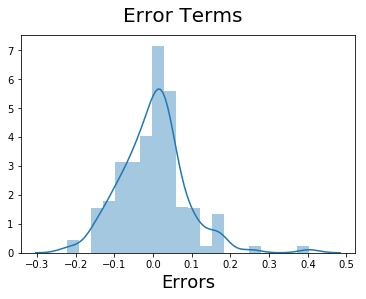

In [1619]:
#Plot the error terms
plot_error_terms(X_train_lm_wo_company, y_train_wo_company, lm_wo_company)

### Making Predictions

In [1620]:
#Predict on test set
y_test_wo_company, y_pred_wo_company = predict_on_test_set(X_train_lm_wo_company, df_test_wo_company, scaler_wo_company, lm_wo_company)

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Model Evaluation

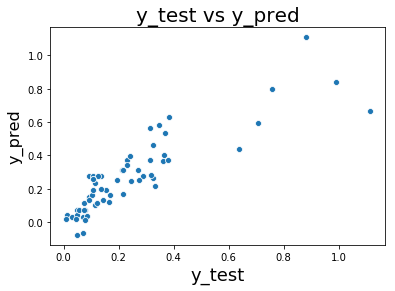

In [1621]:
#Plot the Test Actual Vs Predicted Values
plot_ytest_ypred(y_test_wo_company, y_pred_wo_company, 'y_test vs y_pred')

In [1622]:
#R-2 score
r2_score(y_test_wo_company, y_pred_wo_company)

0.73004653893839377

<a id='model_with_company_groups'/>

[EDA](#eda)<BR>
[Preparing the model](#model_prep)<BR>
- [Model without car company](#model_without_car_company)<BR>
- [Create a model with car companies grouped into categories based on price](#model_with_company_groups)<BR>
- [Model with car companies as it is](#model_with_companys)<BR>
[Conclusions](#conclusions)<BR>

## Create a model with car companies grouped into categories based on price

**The R-2 score of Actual Vs Predicted Test values, although fair, seems like has a room for improvement. Hence, trying with grouping the company names since there are a considerable number. Let's check if the companies actually have any effect!**

In [1623]:
#Car company has too many values. So grouping them based on outcome variable i.e price
# high_range > 25K, low_range <= 25K, bmw - since it falls in both
map_of_carcompany_vs_price_range_company = {'audi': 'mid-price-company', 'bmw': 'span-price-company', 
                                            'dodge': 'low-price-company', 'honda': 'low-price-company',
                                            'mazda': 'low-price-company', 'buick': 'high-price-company',
                                            'mitsubishi': 'low-price-company','nissan': 'low-price-company', 
                                            'peugeot': 'low-price-company','plymouth': 'low-price-company', 
                                            'porsche': 'span-price-company','saab': 'low-price-company',
                                            'subaru': 'low-price-company', 'toyota': 'low-price-company',
                                            'volkswagen': 'low-price-company', 'volvo': 'mid-price-company',
                                            'alfa-romero': 'low-price-company', 'chevrolet': 'low-price-company',
                                            'isuzu': 'low-price-company', 'jaguar': 'high-price-company',
                                            'renault': 'low-price-company', 'mercury': 'high-price-company'
                                           }
car_pricing_ds_with_comp_groups = car_pricing_ds[car_pricing_ds.columns]
car_pricing_ds_with_comp_groups[['price-range-carcompany']] = car_pricing_ds_with_comp_groups[['carcompany']].apply(lambda x: x.map(map_of_carcompany_vs_price_range_company))
car_pricing_ds_with_comp_groups.drop(labels=['carcompany'], axis=1, inplace=True)

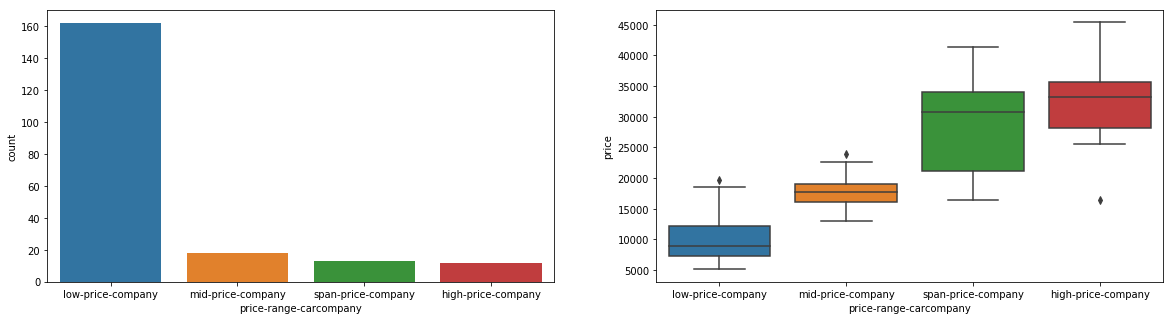

In [1624]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.countplot(x = 'price-range-carcompany', data = car_pricing_ds_with_comp_groups)
plt.subplot(1,2,2)
sns.boxplot(x = 'price-range-carcompany', y = 'price', data = car_pricing_ds_with_comp_groups)

In [1625]:
car_pricing_ds_with_comp_groups = create_dummies_for_cat_columns('price-range-carcompany', None, car_pricing_ds_with_comp_groups) 
car_pricing_ds_with_comp_groups.drop(labels=['mid-price-company'], inplace=True, axis=1)

In [1626]:
#Split the dataset into training and test models and scale the training data using MinMax scaling
df_train_with_comp_groups, df_test_with_comp_groups, scaler_with_comp_groups = split_and_scale_data(car_pricing_ds_with_comp_groups)

#Split the training data into predictors and outcome variables
X_train_with_comp_groups, y_train_with_comp_groups = get_Xtrain_ytrain(df_train_with_comp_groups)

#Compute RFE for 20 predictors
rfe_with_comp_groups = perform_rfe(20, X_train_with_comp_groups, y_train_with_comp_groups)

#Get the RFE based data set for further steps
rferanking_with_comp_groups, X_train_rfe_with_comp_groups = get_RFE_dataset(rfe_with_comp_groups, X_train_with_comp_groups)

rferanking_with_comp_groups

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,predictor,rfesupport,rferanking
38,span-price-company,True,1
26,fuelsystem_idi,True,1
31,symboling_-1,True,1
32,symboling_0,True,1
33,symboling_1,True,1
34,symboling_2,True,1
13,convertible,True,1
12,highwaympg,True,1
11,peakrpm,True,1
37,low-price-company,True,1


In [1627]:
#Train the model for the first time and inspect the Adjusted R-square, F-Statistic, p-values
X_train_lm_with_comp_groups, initial_lm_with_comp_groups = train_initial_model(X_train_rfe_with_comp_groups, y_train_with_comp_groups)
print(initial_lm_with_comp_groups.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     105.3
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           4.29e-67
Time:                        22:25:58   Log-Likelihood:                 224.67
No. Observations:                 143   AIC:                            -407.3
Df Residuals:                     122   BIC:                            -345.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1647      0

In [1628]:
#Compute the initial VIF and inspect the values
initial_vif_with_comp_groups = calc_vif(X_train_lm_with_comp_groups)
initial_vif_with_comp_groups

,Features,VIF
2,curbweight,82.77
5,compressionratio,81.91
11,fuelsystem_idi,53.41
3,enginesize,46.99
1,wheelbase,34.18
6,horsepower,31.12
8,highwaympg,22.49
13,symboling_0,22.30
18,low-price-company,21.28
14,symboling_1,18.27


In [1629]:
#Iterate to get the best model based on p-values and VIF
X_train_lm_with_comp_groups, lm_with_comp_groups, vif_with_comp_groups = iterate_to_get_best_model(X_train_rfe_with_comp_groups, y_train_with_comp_groups)

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1630]:
print(lm_with_comp_groups.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     235.4
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           2.99e-69
Time:                        22:26:07   Log-Likelihood:                 190.85
No. Observations:                 143   AIC:                            -367.7
Df Residuals:                     136   BIC:                            -347.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0932      0

In [1631]:
vif_with_comp_groups

,Features,VIF
2,horsepower,4.20
1,wheelbase,3.54
5,span-price-company,1.40
4,high-price-company,1.28
0,enginelocation,1.19
3,convertible,1.08


### Residual Analysis of the train data

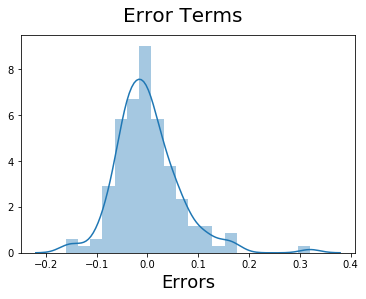

In [1632]:
#Plot the error terms
plot_error_terms(X_train_lm_with_comp_groups, y_train_with_comp_groups, lm_with_comp_groups)

### Making Predictions

In [1633]:
#Predict on test set
y_test_with_comp_groups, y_pred_with_comp_groups = predict_on_test_set(X_train_lm_with_comp_groups, df_test_with_comp_groups, scaler_with_comp_groups, lm_with_comp_groups)

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Model Evaluation

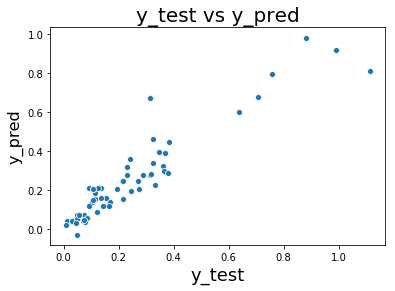

In [1634]:
#Plot the Test Actual Vs Predicted Values
plot_ytest_ypred(y_test_with_comp_groups, y_pred_with_comp_groups, 'y_test vs y_pred')

In [1635]:
#R-2 score
r2_score(y_test_with_comp_groups, y_pred_with_comp_groups)

0.87352771341899305

<a id='model_with_companys'/>

[EDA](#eda)<BR>
[Preparing the model](#model_prep)<BR>
- [Model without car company](#model_without_car_company)<BR>
- [Create a model with car companies grouped into categories based on price](#model_with_company_groups)<BR>
- [Model with car companies as it is](#model_with_companys)<BR>
[Conclusions](#conclusions)<BR>

## Model with car companies as it is

**With the increase in the R-2 score, it has come out that the company does have an effect on the price in addition to just the features of the car. To understand which exactly these companies are, creating a model with the actual companies**

In [1636]:
car_pricing_ds_with_carcompany = create_dummies_for_cat_columns('carcompany', None, car_pricing_ds) 
car_pricing_ds_with_carcompany.drop(labels=['mercury'], inplace=True, axis=1)

In [1637]:
#Split the dataset into training and test models and scale the training data using MinMax scaling
df_train_with_carcompany, df_test_with_carcompany, scaler_with_carcompany = split_and_scale_data(car_pricing_ds_with_carcompany)

#Split the training data into predictors and outcome variables
X_train_with_carcompany, y_train_with_carcompany = get_Xtrain_ytrain(df_train_with_carcompany)

#Compute RFE for 30 predictors
rfe_with_carcompany = perform_rfe(30, X_train_with_carcompany, y_train_with_carcompany)

#Get the RFE based data set for further steps
rferanking_with_carcompany, X_train_rfe_with_carcompany = get_RFE_dataset(rfe_with_carcompany, X_train_with_carcompany)

rferanking_with_carcompany

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,predictor,rfesupport,rferanking
0,aspiration,True,1
21,enginetype_ohcf,True,1
23,enginetype_rotor,True,1
24,fuelsystem_2bbl,True,1
25,fuelsystem_4bbl,True,1
26,fuelsystem_idi,True,1
36,alfa-romero,True,1
38,bmw,True,1
39,buick,True,1
40,chevrolet,True,1


In [1638]:
#Train the model for the first time and inspect the Adjusted R-square, F-Statistic, p-values
X_train_lm_with_carcompany, initial_lm_with_carcompany = train_initial_model(X_train_rfe_with_carcompany, y_train_with_carcompany)
print(initial_lm_with_carcompany.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     99.85
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.77e-67
Time:                        22:27:13   Log-Likelihood:                 254.55
No. Observations:                 143   AIC:                            -447.1
Df Residuals:                     112   BIC:                            -355.3
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3021      0.068  

In [1639]:
#Compute the initial VIF and inspect the values
initial_vif_with_carcompany = calc_vif(X_train_lm_with_carcompany)
initial_vif_with_carcompany

,Features,VIF
8,compressionratio,166.33
18,fuelsystem_idi,119.20
4,curbweight,94.42
5,enginesize,52.38
7,stroke,43.58
2,wheelbase,40.93
6,boreratio,30.88
10,highwaympg,29.10
3,carheight,24.89
13,enginetype_ohc,17.17


In [1640]:
#Iterate to get the best model based on p-values and VIF
X_train_lm_with_carcompany, lm_with_carcompany, vif_with_carcompany = iterate_to_get_best_model(X_train_rfe_with_carcompany, y_train_with_carcompany)

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1641]:
print(lm_with_carcompany.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.2
Date:                Sun, 25 Nov 2018   Prob (F-statistic):           1.17e-64
Time:                        22:27:26   Log-Likelihood:                 190.90
No. Observations:                 143   AIC:                            -359.8
Df Residuals:                     132   BIC:                            -327.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1895      0.028  

In [1642]:
vif_with_carcompany

,Features,VIF
1,carheight,4.37
3,peakrpm,3.90
2,enginesize,3.78
0,aspiration,1.46
7,buick,1.37
8,mitsubishi,1.25
5,enginetype_rotor,1.24
9,porsche,1.18
6,bmw,1.16
4,convertible,1.13


### Residual Analysis of the train data

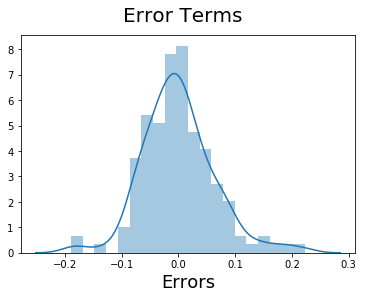

In [1643]:
#Plot the error terms
plot_error_terms(X_train_lm_with_carcompany, y_train_with_carcompany, lm_with_carcompany)

### Making Predictions

In [1644]:
#Predict on test set
y_test_with_carcompany, y_pred_with_carcompany = predict_on_test_set(X_train_lm_with_carcompany, df_test_with_carcompany, scaler_with_carcompany, lm_with_carcompany)

D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Users\jrajesh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Model Evaluation

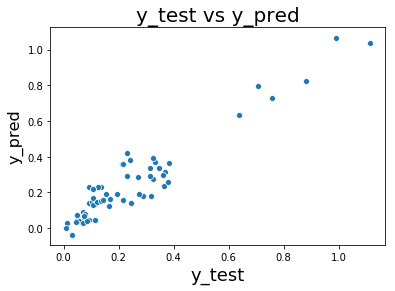

In [1645]:
#Plot the Test Actual Vs Predicted Values
plot_ytest_ypred(y_test_with_carcompany, y_pred_with_carcompany, 'y_test vs y_pred')

In [1646]:
#R-2 score
r2_score(y_test_with_carcompany, y_pred_with_carcompany)

0.90353707829903862

In [1647]:
summary_df = pd.DataFrame(columns=['Model Info', 'R-squared', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)', 
                                   'R-2 score of Actual Vs Predicted Test Price'])
summary_df = summary_df.append(pd.Series(['With Car Company', lm_with_carcompany.rsquared, lm_with_carcompany.rsquared_adj,
                             lm_with_carcompany.fvalue, lm_with_carcompany.f_pvalue, 
                             r2_score(y_test_with_carcompany, y_pred_with_carcompany)
                            ], 
                            index=['Model Info', 'R-squared', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)', 
                                   'R-2 score of Actual Vs Predicted Test Price']), ignore_index=True)
summary_df = summary_df.append(pd.Series(['With Company Groups', lm_with_comp_groups.rsquared, lm_with_comp_groups.rsquared_adj,
                             lm_with_comp_groups.fvalue, lm_with_comp_groups.f_pvalue, 
                             r2_score(y_test_with_comp_groups, y_pred_with_comp_groups)
                            ], 
                            index=['Model Info', 'R-squared', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)', 
                                   'R-2 score of Actual Vs Predicted Test Price']), ignore_index=True)
summary_df = summary_df.append(pd.Series(['Without Company', lm_wo_company.rsquared, lm_wo_company.rsquared_adj,
                             lm_wo_company.fvalue, lm_wo_company.f_pvalue, 
                             r2_score(y_test_wo_company, y_pred_wo_company)
                            ], 
                            index=['Model Info', 'R-squared', 'Adj. R-squared', 'F-statistic', 'Prob (F-statistic)', 
                                   'R-2 score of Actual Vs Predicted Test Price']), ignore_index=True)


In [1648]:
pvals = lm_with_carcompany.pvalues.sort_values()
pvals.drop(labels=['const'], inplace=True)
pvals = pvals.round(decimals = 3)
pvals

enginesize          0.000
bmw                 0.000
enginetype_rotor    0.000
aspiration          0.000
porsche             0.000
buick               0.000
peakrpm             0.000
carheight           0.001
mitsubishi          0.005
convertible         0.008
dtype: float64

In [1649]:
vif_with_carcompany

,Features,VIF
1,carheight,4.37
3,peakrpm,3.90
2,enginesize,3.78
0,aspiration,1.46
7,buick,1.37
8,mitsubishi,1.25
5,enginetype_rotor,1.24
9,porsche,1.18
6,bmw,1.16
4,convertible,1.13


<a id='conclusions'/>

[EDA](#eda)<BR>
[Preparing the model](#model_prep)<BR>
- [Model without car company](#model_without_car_company)<BR>
- [Create a model with car companies grouped into categories based on price](#model_with_company_groups)<BR>
- [Model with car companies as it is](#model_with_companys)<BR>
[Conclusions](#conclusions)<BR>

## Conclusions

In [1650]:
summary_df.head()

,Model Info,R-squared,Adj. R-squared,F-statistic,Prob (F-statistic),R-2 score of Actual Vs Predicted Test Price
0,With Car Company,0.912218,0.905568,137.172187,1.174994e-64,0.903537
1,With Company Groups,0.912159,0.908284,235.374936,2.990401e-69,0.873528
2,Without Company,0.839564,0.831245,100.922365,1.780241e-50,0.730047


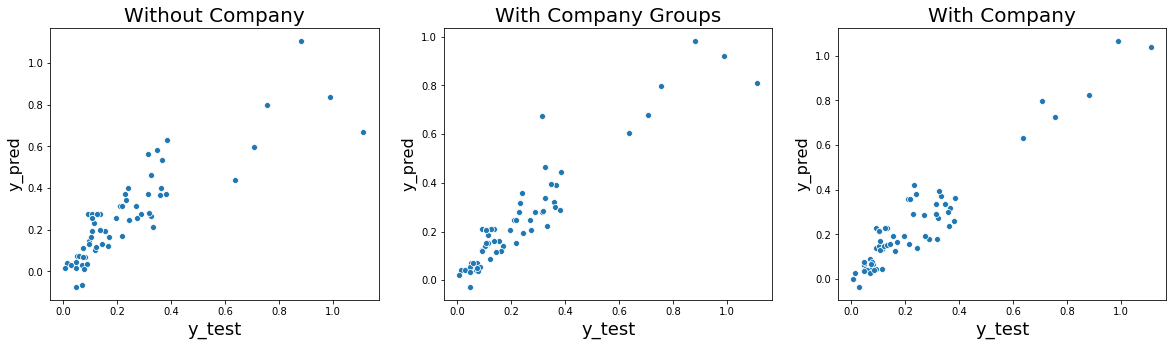

In [1651]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plot_ytest_ypred(y_test_wo_company, y_pred_wo_company, 'Without Company')
plt.subplot(1, 3, 2)
plot_ytest_ypred(y_test_with_comp_groups, y_pred_with_comp_groups, 'With Company Groups')
plt.subplot(1, 3, 3)
plot_ytest_ypred(y_test_with_carcompany, y_pred_with_carcompany, 'With Company')

### Model with Company 
Statistical values and R-2 Score of Actual Vs Predicted Test Values for the model with companies are high.
Since the actual company is observed to be affecting the price, knowing these companies will help.
Hence, Model with Companies, rather than the company groups is recommended.

### Significant Variables
**Engine Size, Aspiration, Car Height, Peak RPM** have an effect on the price of a car.
Additionally, price also is getting affected based on whether the engine type is a **Rotor Engine or not** and whether the car is a **Convertible or not**.
Car companies having an effect on the price are **BMW, Porsche, Buick, Mitsubishi**. The business factors like margin, luxury premium, etc which has not been included in the data set could be a reason for this.
